In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [44]:
directory = 'Dataset/'

In [3]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['Afghan', 'African Wild Dog', 'Airedale', 'American Hairless', 'American Spaniel', 'Basenji', 'Basset', 'Beagle', 'Bearded Collie', 'Bermaise', 'Bichon Frise', 'Blenheim', 'Bloodhound', 'Bluetick', 'Border Collie', 'Borzoi', 'Boston Terrier', 'Boxer', 'Bull Mastiff', 'Bull Terrier', 'Bulldog', 'Cairn', 'Chihuahua', 'Chinese Crested', 'Chow', 'Clumber', 'Cockapoo', 'Cocker', 'Collie', 'Corgi', 'Coyote', 'Dalmation', 'Dhole', 'Dingo', 'Doberman']
35


In [4]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [5]:
dataset=[]
testset=[]
count=0

for file in os.listdir(directory):
    path=os.path.join(directory,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(180,180))
        image=img_to_array(image)
        image=image/255.0
        if t<=20:
            dataset+=[[image,count]]
        else:
            testset+=[[image,count]]
        t+=1
    count=count+1

In [6]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)


In [7]:
labels1=to_categorical(labels0)
labels=np.array(labels1)



In [8]:
data=np.array(data)
test=np.array(test)

In [9]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(588, 180, 180, 3)
(147, 180, 180, 3)
(588, 35)
(147, 35)


In [10]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")



In [11]:
# # ...

# pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')
# pretrained_model3.trainable = False

# inputs3 = pretrained_model3.input
# x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
# outputs3 = tf.keras.layers.Dense(14, activation='softmax')(x3)
# model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

# # Model compilation with updated optimizer and learning rate
# from tensorflow.keras.optimizers import Adam

# optimizer = Adam(learning_rate=0.001)  # Modify the learning rate as desired
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# # ...

# # Model training
# his = model.fit(datagen.flow(trainx, trainy, batch_size=32), validation_data=(testx, testy), epochs=30)

# # ...


In [13]:
from tensorflow.keras.regularizers import l2

# ...

pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')
pretrained_model3.trainable = False

inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)

# Add dropout regularization
x3 = tf.keras.layers.Dropout(0.5)(x3)  # Adjust the dropout rate as desired

outputs3 = tf.keras.layers.Dense(35, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

# Model compilation with regularization
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ...

# Model training
his = model.fit(datagen.flow(trainx, trainy, batch_size=32), validation_data=(testx, testy), epochs=30)

# ...


Epoch 1/30
19/19 [==============================] - 51s 2s/step - loss: 3.7820 - accuracy: 0.0612 - val_loss: 3.2769 - val_accuracy: 0.1769
Epoch 2/30
19/19 [==============================] - 39s 2s/step - loss: 3.1773 - accuracy: 0.1565 - val_loss: 2.7516 - val_accuracy: 0.3401
Epoch 3/30
19/19 [==============================] - 40s 2s/step - loss: 2.8282 - accuracy: 0.2330 - val_loss: 2.0304 - val_accuracy: 0.5034
Epoch 4/30
19/19 [==============================] - 40s 2s/step - loss: 2.3695 - accuracy: 0.3520 - val_loss: 1.4854 - val_accuracy: 0.6122
Epoch 5/30
19/19 [==============================] - 40s 2s/step - loss: 2.0664 - accuracy: 0.4150 - val_loss: 1.0791 - val_accuracy: 0.7211
Epoch 6/30
19/19 [==============================] - 39s 2s/step - loss: 1.7577 - accuracy: 0.5170 - val_loss: 0.8267 - val_accuracy: 0.7755
Epoch 7/30
19/19 [==============================] - 40s 2s/step - loss: 1.6521 - accuracy: 0.5374 - val_loss: 0.7869 - val_accuracy: 0.7687
Epoch 8/30
19/19 [==

In [14]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

5/5 [==============================] - 12s 2s/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         3
           5       1.00      0.86      0.92         7
           6       0.88      1.00      0.93         7
           7       0.50      0.50      0.50         2
           8       0.80      1.00      0.89         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         4
          13       1.00      0.80      0.89         5
          14       0.40      1.00      0.57         2
          16       1.00      1.00      1.00         6
          17       1.00      0

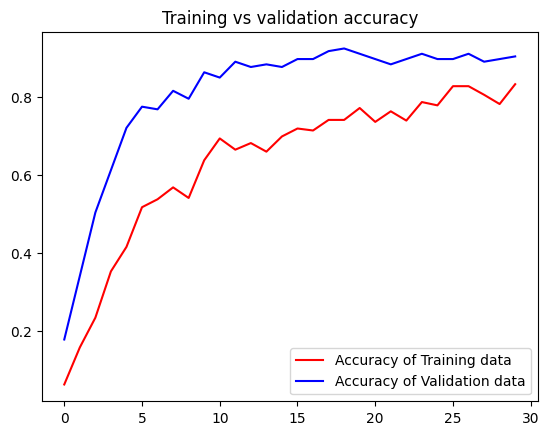

<Figure size 640x480 with 0 Axes>

In [15]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

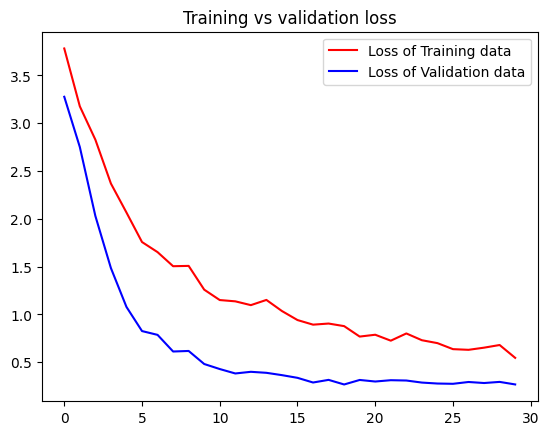

<Figure size 640x480 with 0 Axes>

In [16]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()


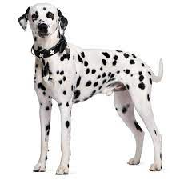

In [39]:
load_img("dalm.jpeg",target_size=(180,180))

In [40]:
image=load_img("dalm.jpeg",target_size=(180,180))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [41]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 0s 107ms/step
Prediction is Dalmation.


In [38]:
print(test.shape)
pred2=model.predict(test)
print(pred2.shape)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]

(3478, 180, 180, 3)
109/109 [==============================] - 193s 2s/step
(3478, 35)


In [42]:
ANS=testlabels0

In [43]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.8884416331224841
